In [42]:
import tensorflow as tf

In [43]:
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

## Image preprocessing

1. converting all image types to jpg format

In [44]:
# image_contents = tf.read_file("aug_7type")
# image = tf.image.decode_jpeg(image_contents, channels=3)

In [45]:
image_SIZE=256
batch_SIZE=32
CHANNELS = 3
EPOCH=10

In [46]:
dataset= tf.keras.preprocessing.image_dataset_from_directory(
    "aug_7_jpj",
    shuffle=True,
    batch_size=batch_SIZE, 
    image_size=(image_SIZE, image_SIZE),
    
)

Found 12334 files belonging to 7 classes.


In [47]:
class_names = dataset.class_names

class_names

['diabetic',
 'fissured',
 'heat_yellow',
 'non-tongue',
 'normal',
 'pitta_red',
 'vata_black']

['diabetic',
 'fissured',
 'heat_yellow',
 'non-tongue',
 'normal',
 'pitta_red',
 'vata_black']

In [48]:
len(dataset)

386

In [49]:
386*32

# batch_SIZE=32
# 12352-12334 = 18
# in last batch only 18 left over

12352

In [50]:
for image_batch, label_batch in dataset. take(1):
    print(image_batch.shape)
    print(label_batch.numpy())


(32, 256, 256, 3)
[4 5 1 1 2 1 5 5 6 6 1 6 5 1 6 4 1 5 2 4 5 6 2 1 6 2 5 5 5 1 5 5]


In [51]:
for image_batch, label_batch in dataset. take(1):
    # plt.imshow(image_batch[0].numpy().astype("uint8"))
    print(image_batch[0].numpy())

[[[0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  ...
  [1.25       2.5625     0.9375    ]
  [3.25       5.0625     2.4375    ]
  [0.         1.         0.        ]]

 [[0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  ...
  [4.3984375  6.2695312  4.0351562 ]
  [1.2695312  3.0820312  1.7773438 ]
  [0.         1.         0.        ]]

 [[0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  ...
  [1.6015625  2.6992188  1.9140625 ]
  [1.2851562  2.109375   2.7851562 ]
  [5.5        7.1875     6.1875    ]]

 ...

 [[0.         1.         0.        ]
  [0.         1.         0.        ]
  [0.         1.         0.        ]
  ...
  [0.         1.4726562  0.        ]
  [0.         1.5625     0.375     ]
  [0.         4.         2.        ]]

 [[0.         1.         0.        ]
  [0.         1.         0.        ]


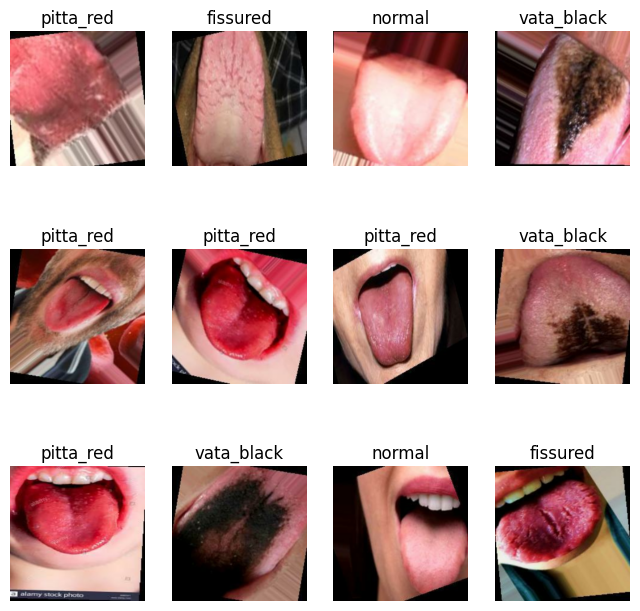

In [52]:
plt.figure(figsize=(8,8))
for image_batch, label_batch in dataset. take(1):
    for i in range(12):
        ax=plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")
  

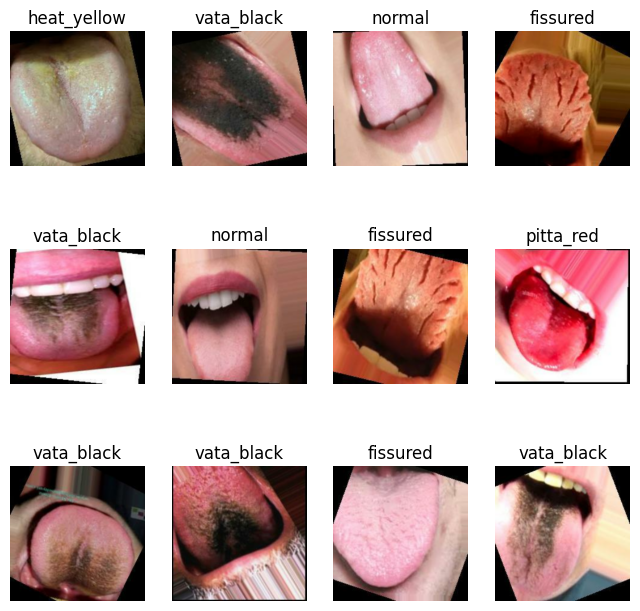

In [53]:
plt.figure(figsize=(8, 8))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")
        

In [54]:
train_size = 0.8
len(dataset)*train_size

308.8

In [55]:
def get_dataset_partition_tf(ds,train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True , shuffle_size=100):
    
    ds_size = len(ds)
    # if shuffle:
    #     ds = ds.shuffle(seed=5)
    train_size = int(train_split*ds_size)
    val_size = int(val_split*ds_size)
    train_ds = ds.take(train_size)
    
    val_ds= ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
   
   
    return train_ds , val_ds , test_ds

In [56]:
train_ds, val_ds, test_ds = get_dataset_partition_tf(dataset)

In [57]:
len(train_ds)

308

In [58]:
len(val_ds)

38

In [59]:
len(test_ds)

40

In [60]:
resize_rescale = tf.keras.Sequential([
    
    layers.Resizing(image_SIZE, image_SIZE),
    layers.Rescaling(1./255)
    # layers.Conv2D(32, 3, activation='relu'),
    # layers.MaxPooling2D(),
])

In [61]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
])

In [62]:
input_shape = (batch_SIZE , image_SIZE, image_SIZE , CHANNELS)
n_classes = 7

model = models.Sequential([
    resize_rescale,
    data_augmentation,
    
    layers.Conv2D(32, (3,3), activation='relu' , input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64,(3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64,(3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64,(3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
    
])

model.build(input_shape=input_shape)



In [63]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_3 (Sequential)       │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_4 (Sequential)       │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (32, 254, 254, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (32, 127, 127, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (32, 125, 125, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (32, 62, 62, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (32, 60, 60, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (32, 30, 30, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (32, 28, 28, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (32, 14, 14, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (32, 12, 12, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (32, 6, 6, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (32, 4, 4, 64)         │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (32, 2, 2, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (32, 256)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (32, 64)               │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (32, 7)                │           455 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 184,007 (718.78 KB)

 Trainable params: 184,007 (718.78 KB)

 Non-trainable params: 0 (0.00 B)

In [64]:
model.compile(
    optimizer ='adam',
    
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [65]:
history= model.fit(
    train_ds,
    batch_size=batch_SIZE,
    epochs=10,
    validation_data=val_ds,
    # validation_batch_size=batch_SIZE,
    # shuffle=True,
    verbose=1
)

Epoch 1/10
308/308 ━━━━━━━━━━━━━━━━━━━━ 4001s 13s/step - accuracy: 0.4210 - loss: 1.4358 - val_accuracy: 0.7146 - val_loss: 0.7684
Epoch 2/10
308/308 ━━━━━━━━━━━━━━━━━━━━ 240s 775ms/step - accuracy: 0.7139 - loss: 0.7703 - val_accuracy: 0.7969 - val_loss: 0.6074
Epoch 3/10
308/308 ━━━━━━━━━━━━━━━━━━━━ 550s 2s/step - accuracy: 0.7969 - loss: 0.5549 - val_accuracy: 0.8306 - val_loss: 0.4456
Epoch 4/10
308/308 ━━━━━━━━━━━━━━━━━━━━ 645s 2s/step - accuracy: 0.8293 - loss: 0.4728 - val_accuracy: 0.8660 - val_loss: 0.4209
Epoch 5/10
308/308 ━━━━━━━━━━━━━━━━━━━━ 501s 2s/step - accuracy: 0.8745 - loss: 0.3692 - val_accuracy: 0.9178 - val_loss: 0.2402
Epoch 6/10
308/308 ━━━━━━━━━━━━━━━━━━━━ 315s 1s/step - accuracy: 0.9031 - loss: 0.2848 - val_accuracy: 0.9243 - val_loss: 0.2361
Epoch 7/10
308/308 ━━━━━━━━━━━━━━━━━━━━ 231s 747ms/step - accuracy: 0.9155 - loss: 0.2545 - val_accuracy: 0.9104 - val_loss: 0.2941
Epoch 8/10
308/308 ━━━━━━━━━━━━━━━━━━━━ 2980s 10s/step - accuracy: 0.9267 - loss: 0.2209 

In [66]:
len(test_ds)

40

In [67]:
history.params

{'verbose': 1, 'epochs': 10, 'steps': 308}

In [68]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [69]:
history.history['accuracy']

[0.556513786315918,
 0.7354910969734192,
 0.8068181872367859,
 0.8502435088157654,
 0.877739429473877,
 0.9074675440788269,
 0.9153814911842346,
 0.9308035969734192,
 0.9400365352630615,
 0.9386160969734192]

In [70]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']

val_loss = history.history['val_loss']

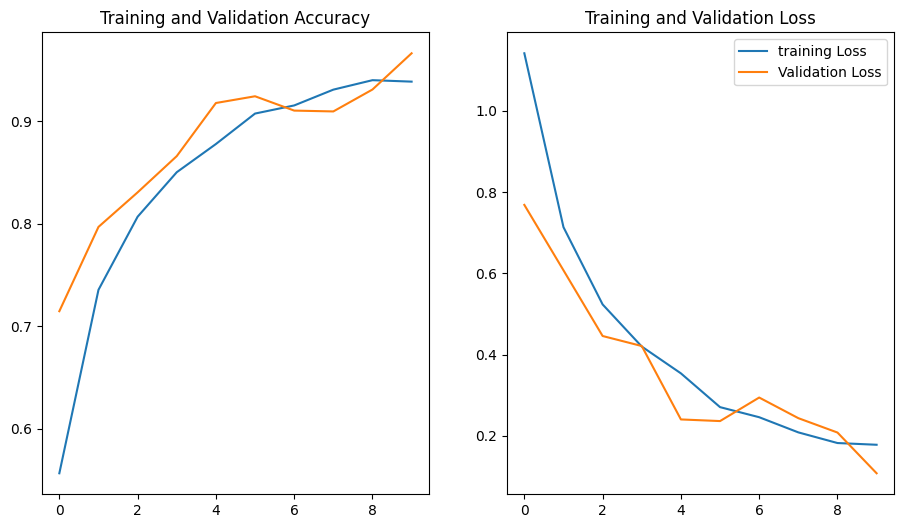

In [71]:
plt.figure(figsize=(11,6))
plt.subplot(1,2,1)
plt.plot(range(EPOCH),acc,label='Training accuracy')
plt.plot(range(EPOCH),val_acc,label='Validation accuracy')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(range(EPOCH),loss,label='training Loss')
plt.plot(range(EPOCH),val_loss,label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()
         

In [72]:
score= model.evaluate(test_ds)

40/40 ━━━━━━━━━━━━━━━━━━━━ 11s 170ms/step - accuracy: 0.9704 - loss: 0.0867


In [73]:
score

[0.09463920444250107, 0.9675118923187256]

In [74]:
import numpy as np


Predict_1st
actual label: fissured
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
predicted_label: heat_yellow


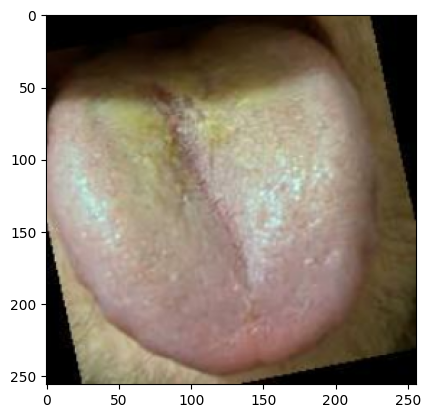

In [75]:
for images_batch,label_batch in test_ds.take(1):
    first_image = image_batch[0].numpy().astype("uint8")
    print("Predict_1st")
    plt.imshow(first_image)
    print("actual label:" ,class_names[label_batch[0].numpy()])
    batch_prediction= model.predict(image_batch)
    print("predicted_label:" ,class_names[np.argmax(batch_prediction[0])])

In [76]:
def predict(model,img):
    img_array = tf.keras.preprocessing.image.img_to_array(image[i].numpy())
    img_array=tf.expand_dims(img_array,0)
    
    prediction = model.predict(img_array)
    predicted_class = class_names[np.argmax(prediction[0])]
    confidence = round(100*(np.max(prediction[0])),2)
    return predicted_class,confidence


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 507ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


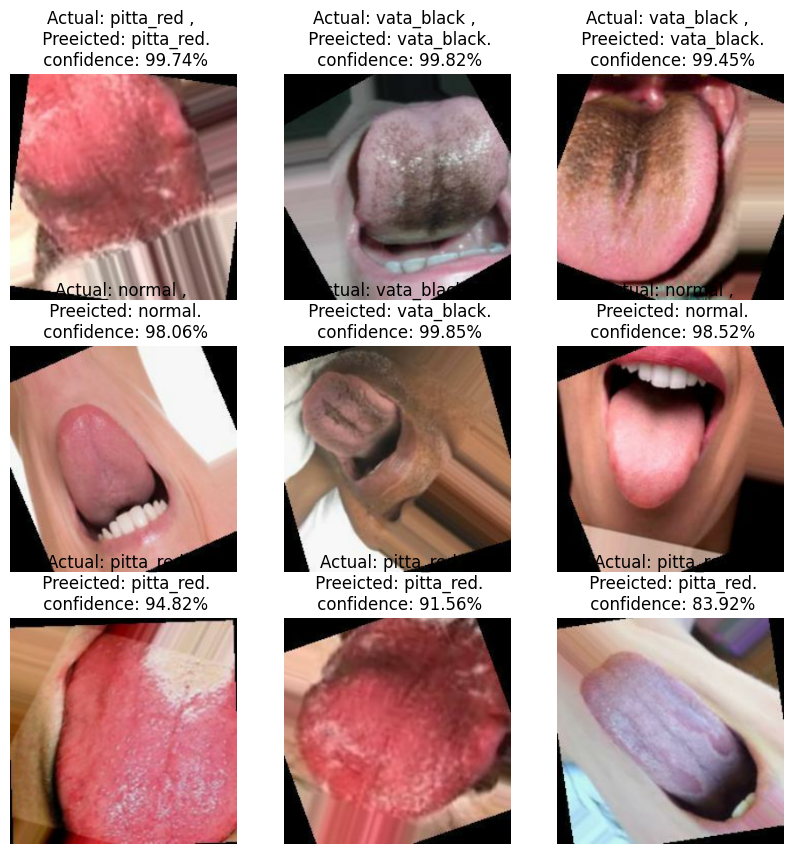

In [77]:
plt.figure(figsize=(10,10   ))
for image, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype("uint8"))
        
        plt.axis("off")
        predicted_class, confidence = predict(model, image[i].numpy())
        actual_class = class_names[labels[i]]
        plt.title(f"Actual: {actual_class} , \n Preeicted: {predicted_class}.\n confidence: {confidence}%")


In [78]:
!pip3 install opencv-python




[notice] A new release of pip is available: 24.1.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [79]:
import cv2

In [80]:
test_image = cv2.imread('ayanbad.jpg')

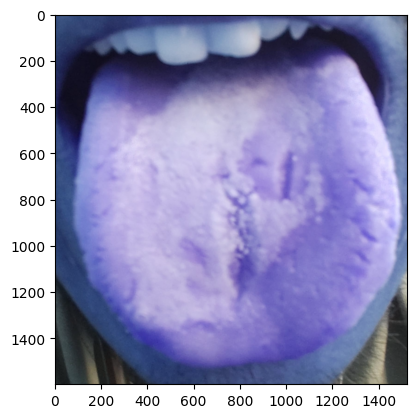

In [81]:
plt.imshow(test_image)

In [82]:
test_image.shape

(1599, 1524, 3)

In [83]:
test_image=cv2.resize(test_image,(255,255))

In [84]:
test_input = test_image.reshape((1,255,255,3))

In [85]:
probab = model.predict(test_input)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


In [86]:

predicted_class = np.argmax(probab)


predicted_label = label_batch[predicted_class]

print(f"Predicted label: {predicted_label}")


Predicted label: 2


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Predicted label: pitta_red
83.92


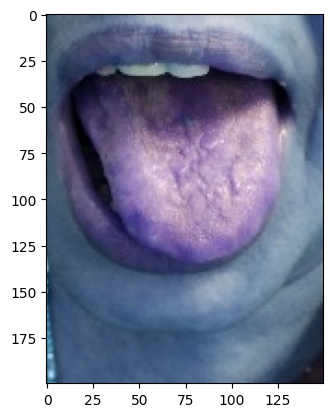

In [87]:
test_image = cv2.imread('diab_gogl.jpg')
plt.imshow(test_image)
test_image.shape
test_image=cv2.resize(test_image,(255,255))
test_input = test_image.reshape((1,255,255,3))
probab = model.predict(test_input)

predicted_class = np.argmax(probab)


predicted_label = class_names[predicted_class]

print(f"Predicted label: {predicted_label}")
print(confidence)




1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Predicted label: diabetic
83.92


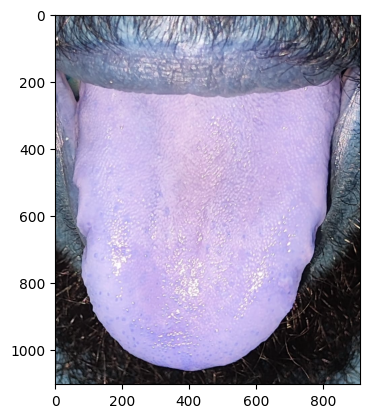

In [88]:
test_image = cv2.imread('prnc.jpg')
plt.imshow(test_image)
test_image.shape
test_image=cv2.resize(test_image,(255,255))
test_input = test_image.reshape((1,255,255,3))
probab = model.predict(test_input)

predicted_class = np.argmax(probab)


predicted_label = class_names[predicted_class]

print(f"Predicted label: {predicted_label}")
print(confidence)




In [ ]:
print(class_names)

['diabetic', 'fissured', 'heat_yellow', 'non-tongue', 'normal', 'pitta_red', 'vata_black']


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
Predicted label: pitta_red
100.0


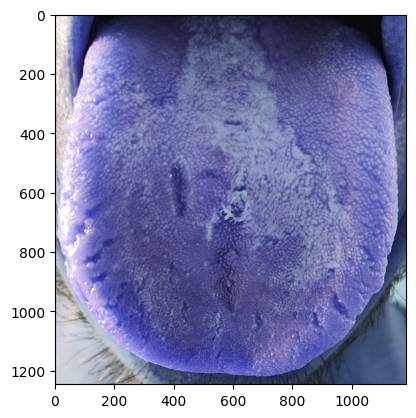

In [ ]:
test_image = cv2.imread('ayan gdc.jpg')
plt.imshow(test_image)
test_image.shape
test_image=cv2.resize(test_image,(255,255))
test_input = test_image.reshape((1,255,255,3))
probab = model.predict(test_input)

predicted_class = np.argmax(probab)


predicted_label = class_names[predicted_class]

print(f"Predicted label: {predicted_label}")

print(confidence)




In [ ]:

# image_path = input("Enter the path to the image file: ")

# img = Image.open(image_path)

# img

# Process the image as needed


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 533ms/step
Predicted label: diabetic


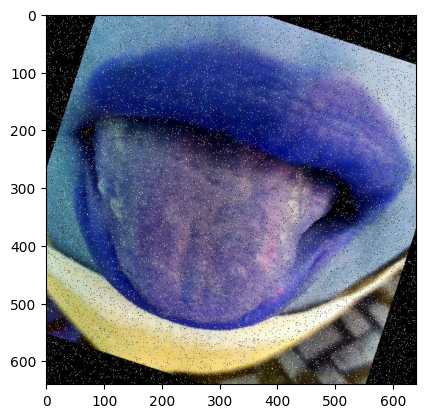

In [ ]:
test_image = cv2.imread('diab_google.jpg')
plt.imshow(test_image)
test_image.shape
test_image=cv2.resize(test_image,(255,255))
test_input = test_image.reshape((1,255,255,3))
probab = model.predict(test_input)

predicted_class = np.argmax(probab)


predicted_label = class_names[predicted_class]

print(f"Predicted label: {predicted_label}")


